In [1]:
### --- Libraries --- ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import scipy as sp
from matplotlib import gridspec
from scipy.optimize import curve_fit
from math import isclose


1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

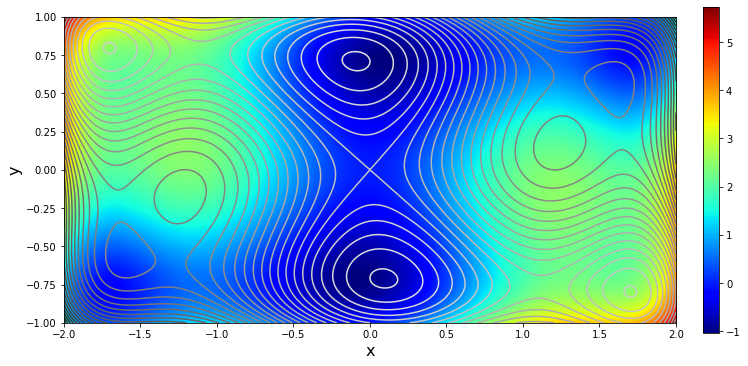

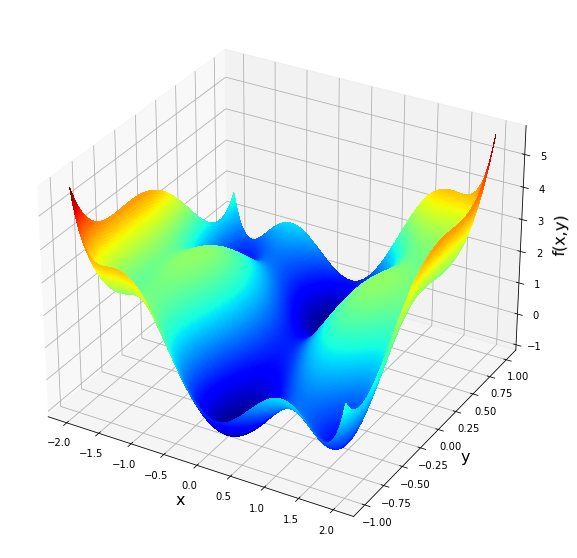

In [292]:
def f(x):
    '''
        six-hump camelback function
    '''
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]+ (-4 + 4*x[1]**2) * x[1] **2)

## -- Visualize the function -- #

x = np.linspace(-2,2,500) # restrict variable to -2 < x < 2
y = np.linspace(-1,1,500) #  -1 < y < 1

# define meshgrid
xg, yg = np.meshgrid(x, y)
# evaluate f 
f_g = f([xg, yg])

heights = np.arange(-2, 7, 0.2)

# 2D density plot
plt.figure(figsize=(12,6))
img = plt.imshow(f_g, cmap='jet',extent=[-2, 2, -1, 1])
plt.colorbar(img, fraction=0.046, pad=0.04)
# plot contour 
plt.contour(xg, yg, f_g, levels=heights, cmap='binary')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

# 3D surface plot
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, f_g, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)

ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('f(x,y)', fontsize=16)
plt.show()

From the previous graph we can infer that the function has 6 local minima and a saddle point in (0,0). 

The global minima seems to be 
in one of these regions: ( [-0.25, 0.25], [0.50, 1.00] ) or ( [-0.25, 0.25], [-0.50, -1.00] ). We will then evaluate the function 
around these points. 


In [295]:
def f(x):
    '''
        six-hump camelback function
    '''
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]+ (-4 + 4*x[1]**2) * x[1] **2)

# a)

methods = ['Nelder-Mead', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA' , 'SLSQP', 'Powell']

# Initial guess of minimization method
x0 = [np.random.uniform(-2,2), np.random.uniform(-1,1)]

print(f'Using {x0} as starting point \n')

# different attempts
for i in methods:
    solution = sp.optimize.minimize(f, x0, method = i)  # solution of the optimization
    if solution.success:
        minimum = solution.x
        print('Using the {} method, the global minimum is: {} \n'.format(i, minimum))



Using [-0.5323726606097434, 0.16359661234280098] as starting point 

Using the Nelder-Mead method, the global minimum is: [-0.08981444  0.71262579] 

Using the CG method, the global minimum is: [-0.08984201  0.7126564 ] 

Using the BFGS method, the global minimum is: [-0.08984146  0.71265654] 

Using the L-BFGS-B method, the global minimum is: [-0.08984091  0.71265684] 

Using the TNC method, the global minimum is: [-0.08986855  0.71266385] 

Using the COBYLA method, the global minimum is: [ 0.08992918 -0.7126013 ] 

Using the SLSQP method, the global minimum is: [-0.08986113  0.71267241] 

Using the Powell method, the global minimum is: [ 0.08984201 -0.71265627] 



The function is invariant under a change of sign of both x and y, so we expect the global minima to be actually two. 
Considering the results, the two points should be (-0.08984098, 0.71271293) and (0.08984098, -0.71271293), 
but we're still not sure whether they're global or local minima. In order to verify that, we find all the minima
and evaluate f(x,y) in them.

In [296]:
# b)
# choose starting points close to minima based on previous figures
x_zeros = [[-1.7,0.7], [0.0,0.7], [1.7,0.7], [-1.7,-0.7], [0.0,-0.7], [1.7,-0.7]]

minima = [] 

# variable to store global minima
gl_min = 0
gl_min2 = 0

# variable to store value of f 
f_gmin = 0


for x0 in x_zeros:
    solution = sp.optimize.minimize(f, x0) 
    if solution.success:        
        minimum = solution.x   
        f_minim = f(minimum)  # value of function in found minimum
        minima.append(minimum)
        if f_minim < f_gmin: # check if the found minimum is local or global
            f_gmin = f_minim
            gl_min = minimum

# check if the function assumes same value as global min in other points            
for m in minima:
    if isclose(f_gmin, f(m)) and not np.allclose(m, gl_min):
        gl_min2 = m            

print('The six minima of the function are:')
for i in range(len(minima)):
    print(minima[i], 'and the value of the function is ', f(minima[i]))
            
print('\n','The global minima are:', gl_min, 'and', gl_min2, 'where the function value is:', f_gmin)




The six minima of the function are:
[-1.70360673  0.79608356] and the value of the function is  -0.21546382438371592
[-0.08984202  0.71265639] and the value of the function is  -1.031628453489876
[ 0.08984217 -0.71265625] and the value of the function is  -1.0316284534895555
[-0.08984218  0.71265623] and the value of the function is  -1.031628453489496
[ 0.08984201 -0.71265641] and the value of the function is  -1.0316284534898772
[ 1.7036067  -0.79608357] and the value of the function is  -0.21546382438371514

 The global minima are: [ 0.08984201 -0.71265641] and [-0.08984218  0.71265623] where the function value is: -1.0316284534898772


In [297]:
# c) 
solution00 = sp.optimize.minimize(f, [0,0])
if solution00.success:
    min_00 = solution00.x
    print(min_00)

[0. 0.]


Since (0,0) is a saddle point scipy.optimize.minimize() gets stuck in it when choosing it as starting point

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

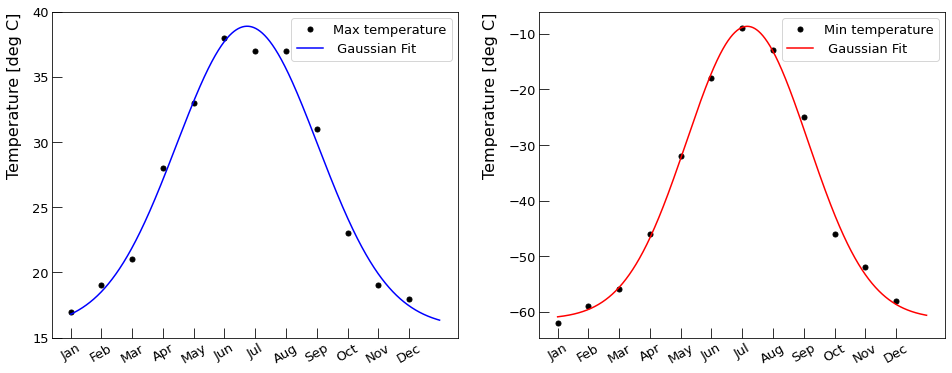

In [298]:
def gauss(x, A, N, mu, sigma):

    '''
        Function that performs gaussian fit
    '''

    g = N*np.exp(-((x-mu)**2/(2*sigma**2))) + A
    return g

max_y = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_y = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

par1, cov1 = curve_fit(f = gauss, xdata = x, ydata = max_y) 

par2, cov2 = curve_fit(f = gauss, xdata = x, ydata = min_y)  

fig,((ax1,ax2)) = plt.subplots(1,2,figsize=(16,6))

# array to evaluate function and plot it 
x_f = np.arange(1,13,0.01)

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax1.plot(x,max_y, label='Max temperature', marker = 'o',markerfacecolor = 'black',markeredgecolor = 'black',markersize=5, lw = 0)
ax1.plot(x_f, gauss(x_f, *par1), color = 'blue', linewidth = 1.5, linestyle='-', label = ' Gaussian Fit')

ax1.set_ylim(15,40)

ax2.plot(x,min_y, label='Min temperature', marker = 'o',markerfacecolor = 'black',markeredgecolor = 'black',markersize=5, lw = 0)
ax2.plot(x_f, gauss(x_f, *par2), color = 'red', linewidth = 1.5, linestyle='-', label = ' Gaussian Fit')

for ax in fig.get_axes():
    ax.set_xticks(1+np.arange(len(months)))
    ax.set_xticklabels(months, rotation = 30)
    ax.set_ylabel('Temperature [deg C]', fontsize = 16, loc = 'top', labelpad = 10)
    ax.legend(loc = 'best', prop = {'size': 13}, ncol = 1)
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10,labelsize = 13)

plt.show()


In [309]:
# retrieve errors on centroids
err_min = np.sqrt(np.diag(cov1))[2]
err_max = np.sqrt(np.diag(cov2))[2]
# compute delta 
delta_err = np.sqrt(err_max**2 + err_min**2)

print('Time offset between the two fit: \n')
print('Centroid of T_min = {:1.2f} ± {:1.2f}'.format(par1[2],err_min))
print('Centroid of T_max = {:1.2f} ± {:1.2f}'.format(par2[2],err_max))
print('The time offset is  {:1.2f} ± {:1.2f}'.format(abs(par1[2]-par2[2]),delta_err))  
print('The compatibility between the two centroids is {:1.2f}'.format(abs(par1[2]-par2[2])/delta_err), ',quite big with respect to the fit accuracy')

Time offset between the two fit: 

Centroid of T_min = 6.74 ± 0.08
Centroid of T_max = 7.16 ± 0.05
The time offset is  0.43 ± 0.09
The compatibility between the two centroids is 4.64 ,quite big with respect to the fit accuracy


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [258]:
data = pd.DataFrame(np.load('data/residuals_261.pkl', allow_pickle = True).item())
# filter data
data = data.loc[(data['residuals'] > -2) & (data['residuals'] < 2)]
data.describe()

,residuals,distances
count,10489.000000,10489.000000
mean,-0.121878,9.954824
std,0.439143,5.847142
min,-2.000000,0.000000
25%,-0.280000,4.700000
50%,-0.100000,10.000000
75%,0.070000,15.100000
max,1.992857,24.900000


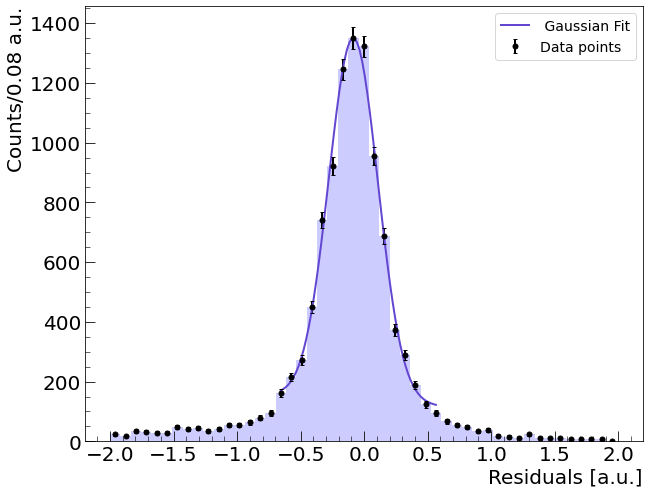

In [259]:
def gauss(x, N, mu, sigma,a,b):

    '''
        Function that performs gaussian 
        plus linear background fit

    '''

    g = N*np.exp(-((x-mu)**2/(2*sigma**2))) + a + b*x
    return g


fig,ax = plt.subplots(1,1,figsize=(10,8))

y_data = data['residuals']

n,bins,_ = ax.hist(y_data, bins=np.linspace(y_data.min(), y_data.max()), color = '#CCCCFF',alpha = 1)

# bin width 
bin_w = bins[1] - bins[0]

# array of bin centers
x = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)])

# adding a column dividing by bins 
data['bin'] = np.digitize(data['residuals'], bins=bins)

# array of mean values of the residuals 
y = data.groupby('bin')['residuals'].mean().iloc[:-1]

# set Poisson uncertainty on each bin   
poisson_err =  np.sqrt(n)  

# perform fit 
par, cov = curve_fit(f = gauss, xdata = x[16:31], ydata = n[16:31], sigma = poisson_err[16:31]) 

# create array to plot fit results 
x_g = np.arange(x[16],x[31],0.02)

# plot gaussian curve and data points
ax.plot(x_g, gauss(x_g, *par), color = '#6447D1', linewidth = 2, linestyle='-', label = ' Gaussian Fit')

ax.errorbar(x, n, yerr=poisson_err, label='Data points', marker = 'o',markerfacecolor = 'black',
                                markeredgecolor = 'black',markersize=5, lw = 0, ecolor='black', elinewidth=2, capsize=2)

# plot settings
ax.set_xlabel('Residuals [a.u.]', fontsize = 20, loc = 'right')
ax.set_ylabel('Counts/{:.2f} a.u.'.format(bin_w), fontsize = 20, loc = 'top')                              
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()

ax.legend(loc='best', fontsize=14)
plt.show()


In [260]:
# Get parameters
N = par[0]
mu = par[1]
er_mu = np.sqrt(np.diag(cov))[1]
sigma = par[2]
er_s = np.sqrt(np.diag(cov))[2]
mu = '$\mu$ = (' + format(mu, '1.3f') + '±' + format(er_mu, '1.3f') + ') a.u.'
sigma = '$\sigma$ = (' + format(sigma, '1.3f') + '±' + format(er_s, '1.3f') + ') a.u.'

## Goodness of fit
The goodness of fit can be evaluated in different ways:
- Analysis of the residuals of the fit $ y - y_{fit} $ to have a first idea of how well 
  the experimental points are in agreement with the theoretical trend
- $\chi^{(2)}$ 

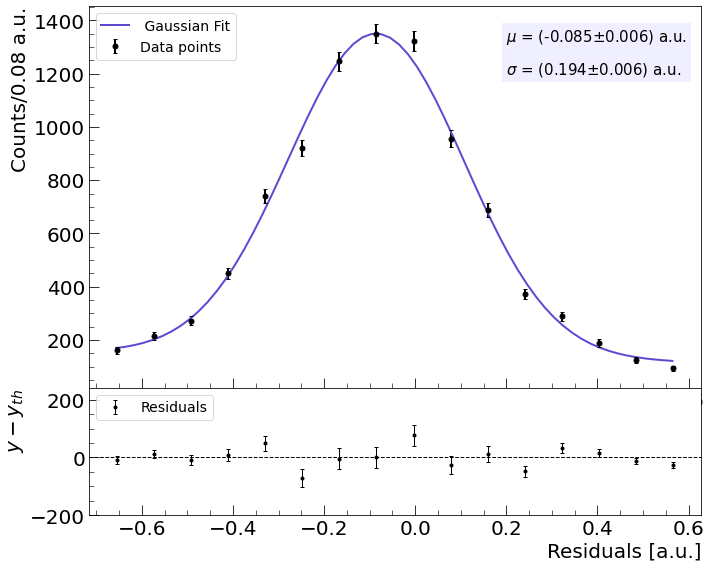

In [261]:
# 1) Residuals of fit 
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 1,height_ratios=[3, 1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharex = ax1)


# plot gaussian curve and only data points that were considered in fit 
ax1.plot(x_g, gauss(x_g, *par), color = '#6447D1', linewidth = 2, linestyle='-', label = ' Gaussian Fit')

ax1.errorbar(x[16:32], n[16:32], yerr=poisson_err[16:32], label='Data points', marker = 'o',markerfacecolor = 'black',
                                markeredgecolor = 'black',markersize=5, lw = 0, ecolor='black', elinewidth=2, capsize=2)
ax1.set_ylabel('Counts/{:.2f} a.u.'.format(bin_w), fontsize = 20, loc = 'top') 

# Compute them  
y_th = gauss(x, *par)
res = n - y_th 
ax2.errorbar(x[16:32], res[16:32], yerr = poisson_err[16:32], marker = '.', linewidth = 0, elinewidth= 1 , color = 'black', label = 'Residuals',capsize=2)
ax2.axhline(color = 'black', linewidth = 1, linestyle = '--')
ax2.set_ylim( bottom = -200, top = 240)
ax2.set_ylabel('$y-y_{th}$', fontsize = 20, loc = 'top') 

for ax in fig.get_axes():
    # plot settings
    ax.set_xlabel('Residuals [a.u.]', fontsize = 20, loc = 'right')                             
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
    ax.minorticks_on()
    ax.legend(loc='upper left', fontsize=14)

t = mu + '\n' + sigma 
ax1.text(0.2, 1200, t , fontsize = 15, linespacing = 2 , bbox=dict(facecolor='#CCCCFF',edgecolor='none', alpha=0.3))


fig.tight_layout()

plt.subplots_adjust(hspace=.0)
plt.show()


The fit residuals seem to be randomly distributed around zero, hence this indicates 
that the chosen function fits well the data. 

chi2 = 36.030854266589145
Number of degrees of freedom = 11
p-value = 0.0001672481272562143


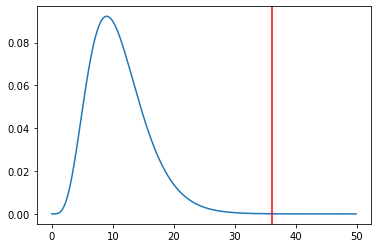

In [262]:
# 2) Chi-square 

# Consider only points that were fitted 
res_fit = res[16:32]
err_fit = poisson_err[16:32]

# Compute chi-square 
chi2 = np.sum(res_fit**2/err_fit**2)
print("chi2 =", chi2)
# Number of degrees of freedom ndof = N - # of parameters  
ndof = len(res_fit) - 5
print("Number of degrees of freedom =", ndof)

# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - sp.stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

p = np.arange(0, 50, 0.1)
#plt.plot(p, sp.stats.chi2.cdf(p, df=ndof))
plt.plot(p, sp.stats.chi2.pdf(p, df=ndof)) 
plt.axvline(chi2, color='r')

### TO DO 

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [263]:
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep = '\t',header = None )
data.columns = ['year','temp']
data

,year,temp
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


In [264]:
# with a preliminary analysis some corrupted data was found 

# Check if there are NaNs 
print(np.isnan(x).any())
print(np.isnan(y).any())

count_nan_y = data['year'].isnull().sum()
count_nan_t = data['temp'].isnull().sum()
print('Count of NaN in year column: ', count_nan_y)
print('Count of NaN in temperature column: ', count_nan_t)

# eliminate rows with NaNs 
data = data.dropna(how='all')

# double check
print(data['year'].isnull().any())
print(data['temp'].isnull().any())


False
False
Count of NaN in year column:  4
Count of NaN in temperature column:  4
False
False


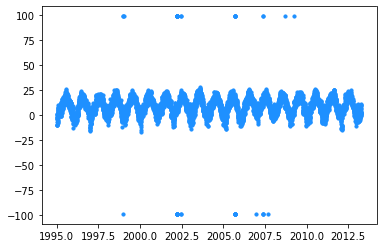

In [265]:
# Plot data 
plt.scatter(data['year'],data['temp'], s = 10, color = '#1E90FF')

# Looking at the following figure there seem to be outliers
# --> remove them and choose only range 2008-2012
data_fil = data.loc[(data['temp'] > -50) & (data['temp'] < 50) & (data['year'] >= 2008) & (data['year'] <= 2012) ]

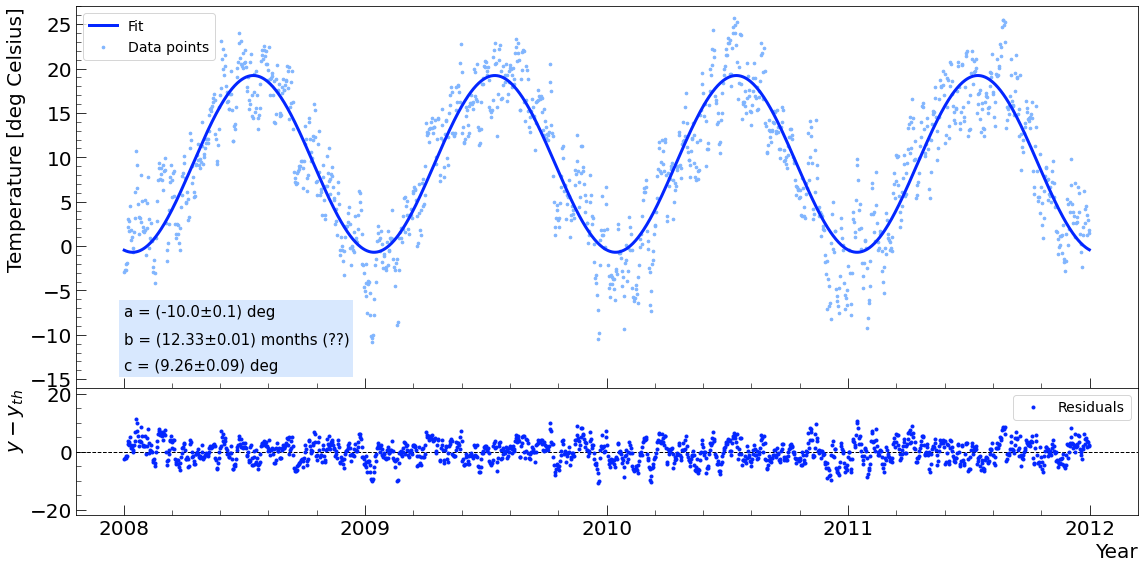

In [275]:
def myFunc(x,a,b,c):
    f = a*np.cos(2*np.pi*x + b) + c 
    return f


fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(2, 1,height_ratios=[3, 1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharex = ax1)

x = data_fil['year']
y = data_fil['temp']

# perform fit 
par, cov = curve_fit(f = myFunc, xdata = x, ydata = y)

# plot curve and data points 
ax1.plot(x, myFunc(x, *par), color = '#0326FF', linewidth = 3, linestyle='-', label = 'Fit')
ax1.scatter(x,y, s=7 , color = '#80B5FE', label = 'Data points')

ax1.set_ylabel('Temperature [deg Celsius]', fontsize = 20, loc = 'top') 
ax1.set_ylim( bottom = -16, top = 27)

# Compute residuals   
y_th = myFunc(x, *par)
res = y - y_th 
ax2.errorbar(x, res, yerr = 0, marker = '.', lw = 0, color = '#0326FF', label = 'Residuals')
ax2.axhline(color = 'black', linewidth = 1, linestyle = '--')
ax2.set_ylim( bottom = -22, top = 22)
ax2.set_ylabel('$y-y_{th}$', fontsize = 20, loc = 'top') 

for ax in fig.get_axes():
    # plot settings
    ax.set_xlabel('Year', fontsize = 20, loc = 'right')   
    ax.set_xticks(np.arange(2008,2013, 1))                          
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
    ax.minorticks_on()
    ax.legend(loc='best', fontsize=14)


# Get parameters and errors 
a = par[0]
b = par[1]
c = par[2]
err_a = np.sqrt(np.diag(cov))[0]
err_b = np.sqrt(np.diag(cov))[1]
err_c = np.sqrt(np.diag(cov))[2]

a = 'a = (' + format(a, '1.1f') + '±' + format(err_a, '1.1f') + ') deg'
b = 'b = (' + format(b, '1.2f') + '±' + format(err_b, '1.2f') + ') months (??)'
c = 'c = (' + format(c, '1.2f') + '±' + format(err_c, '1.2f') + ') deg'

t = a + '\n' + b + '\n' + c
ax1.text(2008, -14, t , fontsize = 15, linespacing = 2 , bbox=dict(facecolor='#80B5FE',edgecolor='none', alpha=0.3))

fig.tight_layout()

plt.subplots_adjust(hspace=.0)
plt.show()


In [255]:
# a)
print('The best-fit values of parameters are:')
print(a + '\n' + b + '\n' + c)

# b) 
av_temp = np.mean(data_fil['temp'])
print('The overall average temperature in Munich is: {:1.1f} deg Celsius'.format(av_temp))

max_t = myFunc(x, *par).max()
min_t = myFunc(x, *par).min()
print('The typical daily average values for the coldest and hottest time of year are {:1.1f} deg and {:1.1f} deg respectively'.format(min_t,max_t))

# c)
print('The b parameter is a phase in the cosine function: physically it indicates that temperatures follow a trend with a period of 12 months')

The best-fit values of parameters are:
a = (-10.0±0.1) deg
b = (12.33±0.01) months
c = (9.26±0.09) deg
The overall average temperature in Munich is: 9.2 deg Celsius
The typical daily average values for the coldest and hottest time of year are -0.7 deg and 19.2 deg respectively
The b parameter is a phase in the cosine function: physically it indicates that temperatures follow a trend with a period of 12 months


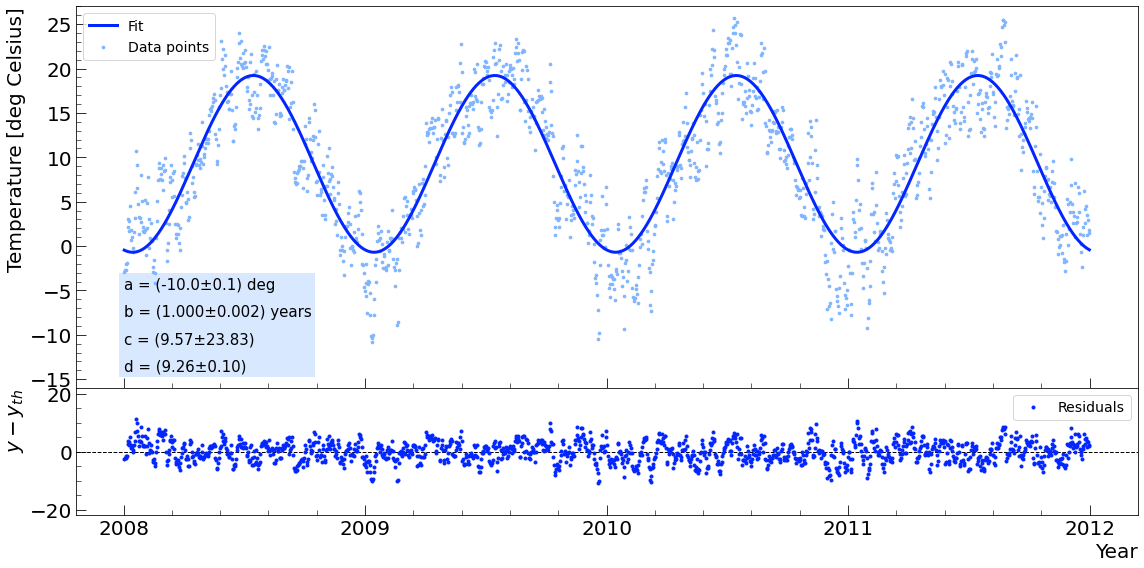

In [276]:
def myFunc2(x,a,b,c,d):
    g = a*np.cos(2*b*np.pi*x + c) + d
    return g

fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(2, 1,height_ratios=[3, 1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharex = ax1)

x = data_fil['year']
y = data_fil['temp']

# perform fit 
par2, cov2 = curve_fit(f = myFunc2, xdata = x, ydata = y)

# plot curve and data points 
ax1.plot(x, myFunc2(x, *par2), color = '#0326FF', linewidth = 3, linestyle='-', label = 'Fit')
ax1.scatter(x,y, s=7 , color = '#80B5FE', label = 'Data points')

ax1.set_ylabel('Temperature [deg Celsius]', fontsize = 20, loc = 'top') 
ax1.set_ylim( bottom = -16, top = 27)

# Compute residuals   
y_th2 = myFunc2(x, *par2)
res2 = y - y_th2 
ax2.errorbar(x, res2, yerr = 0, marker = '.', lw = 0, color = '#0326FF', label = 'Residuals')
ax2.axhline(color = 'black', linewidth = 1, linestyle = '--')
ax2.set_ylim( bottom = -22, top = 22)
ax2.set_ylabel('$y-y_{th}$', fontsize = 20, loc = 'top') 

for ax in fig.get_axes():
    # plot settings
    ax.set_xlabel('Year', fontsize = 20, loc = 'right')   
    ax.set_xticks(np.arange(2008,2013, 1))                          
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
    ax.minorticks_on()
    ax.legend(loc='best', fontsize=14)


# Get parameters and errors 
a = par2[0]
b = par2[1]
c = par2[2]
d = par2[3]
err_a = np.sqrt(np.diag(cov2))[0]
err_b = np.sqrt(np.diag(cov2))[1]
err_c = np.sqrt(np.diag(cov2))[2]
err_d = np.sqrt(np.diag(cov2))[3]

a = 'a = (' + format(a, '1.1f') + '±' + format(err_a, '1.1f') + ') deg'
b = 'b = (' + format(b, '1.3f') + '±' + format(err_b, '1.3f') + ') years'
c = 'c = (' + format(c, '1.2f') + '±' + format(err_c, '1.2f') + ') '
d = 'd = (' + format(d, '1.2f') + '±' + format(err_d, '1.2f') + ') '

t = a + '\n' + b + '\n' + c + '\n' + d 
ax1.text(2008, -14, t , fontsize = 15, linespacing = 2 , bbox=dict(facecolor='#80B5FE',edgecolor='none', alpha=0.3))

fig.tight_layout()

plt.subplots_adjust(hspace=.0)
plt.show()


In [291]:
print('The best-fit values of parameters are:')
print(a + '\n' + b + '\n' + c + '\n' + d )

## TO DO ##

SRR_f = np.sum(res**2)
SRR_g = np.sum(res2**2)

print('SSR values are {:1.3f} and {:1.3f} for f(x) and g(x)'.format(SRR_f,SRR_g))


The best-fit values of parameters are:
a = (-10.0±0.1) deg
b = (1.000±0.002) years
c = (9.57±23.83) 
d = (9.26±0.10) 
SSR values are 18637.251 and 18637.090 for f(x) and g(x)


In [290]:
from scipy.stats import f

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: 
        print('CL: {:.3f}'.format(CL), '--> additional parameter necessary:', 'YES' if CL < 0.10 else 'NO')
    return CL


N = len(x)

y1 = myFunc(x, *par)
y2 = myFunc2(x, *par2)

# run F-test
# test f vs g
print('Test f(x) vs g(x):')
cl_1_vs_2 = Ftest(SRR_f, SRR_g, 3, 4, N, verbose=True)


Test f(x) vs g(x):
CL: 0.911 --> additional parameter necessary: NO
